# Session 24 - The Metropolis-Hastings Algorithm

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

def target_distribution(x):
    return sts.norm(-4, 0.5**2).pdf(x) + sts.norm(4, 1**2).pdf(x)
    
def proposal_distribution(x, x1, parameter):
    return sts.norm(x1, parameter**2).pdf(x)
    
def proposal_sample(x1, parameter):
    return sts.norm.rvs(x1, parameter**2)

In [17]:
def met_hast_algorithm(iters, parameter):
    samples = [sts.uniform.rvs(-10,10)]
    
    for i in range(iters):
        
        xt = samples[-1]
        
        xs = proposal_sample(xt, parameter)
        
        a = target_distribution(xs)/target_distribution(xt)*proposal_distribution(xt, xs, parameter)/proposal_distribution(xs, xt, parameter)
        
        ## accepting
        if np.random.random() <= min (1, a):
            samples.append(xs)
        ## rejecting
        else:
            samples.append(xt)
            
    return samples


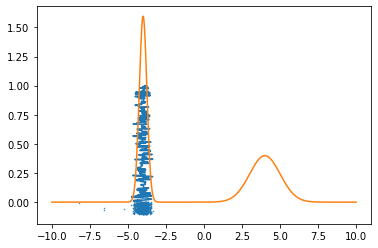

In [18]:
x = np.linspace(-10, 10, 10000)
plt.plot(met_hast_algorithm(1000, 1),np.linspace(0,1,1001))
plt.scatter(met_hast_algorithm(1000, 1),[(np.random.random()/10)-0.1 for i in range(1001)], s=0.2)
plt.plot(x, target_distribution(x))
plt.show()

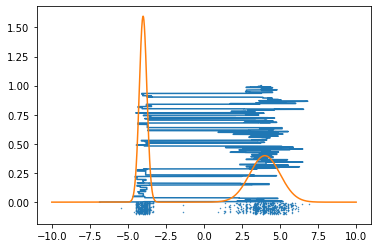

In [19]:
x = np.linspace(-10, 10, 10000)
plt.plot(met_hast_algorithm(1000, 2),np.linspace(0,1,1001))
plt.scatter(met_hast_algorithm(1000, 2),[(np.random.random()/10)-0.1 for i in range(1001)], s=0.2)
plt.plot(x, target_distribution(x))
plt.show()

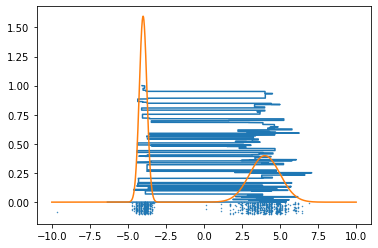

In [20]:
x = np.linspace(-10, 10, 10000)
plt.plot(met_hast_algorithm(1000, 3),np.linspace(0,1,1001))
plt.scatter(met_hast_algorithm(1000, 3),[(np.random.random()/10)-0.1 for i in range(1001)], s=0.2)
plt.plot(x, target_distribution(x))
plt.show()

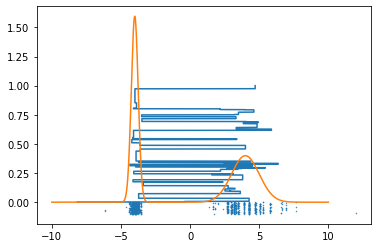

In [21]:
x = np.linspace(-10, 10, 10000)
plt.plot(met_hast_algorithm(1000, 4),np.linspace(0,1,1001))
plt.scatter(met_hast_algorithm(1000, 4),[(np.random.random()/10)-0.1 for i in range(1001)], s=0.2)
plt.plot(x, target_distribution(x))
plt.show()

In [22]:
from scipy import signal

def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt
    
    plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))


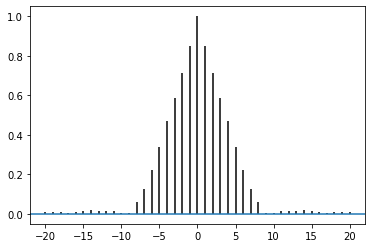

In [23]:
plot_acf(met_hast_algorithm(1000, 1))